# Compare IFS with Science camera

In [27]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

from astropy.io import fits

IFScube = fits.getdata('/Users/mrizzo/Downloads/data_IFS_170626/run501it04662.fits')
SPCslicename = np.array([0,5,9,13,17,21,25])
SPCslicenum = np.array([6*i+SPCslicename[i] for i in range(len(SPCslicename))])
print(SPCslicenum)
IFSslices = IFScube[SPCslicenum]
IFSslices[IFSslices<0] =0.0
print(IFSslices.shape)
SPCslices = np.zeros((len(SPCslicename),500,500))
for i in range(len(SPCslicename)):
    j = SPCslicename[i]
    SPCslices[i] =fits.getdata('/Users/mrizzo/Downloads/data_IFS_170626/run501it04662_band_'+str(j)+'_SPC.fits')

Populating the interactive namespace from numpy and matplotlib
[ 0 11 21 31 41 51 61]
(7, 200, 200)


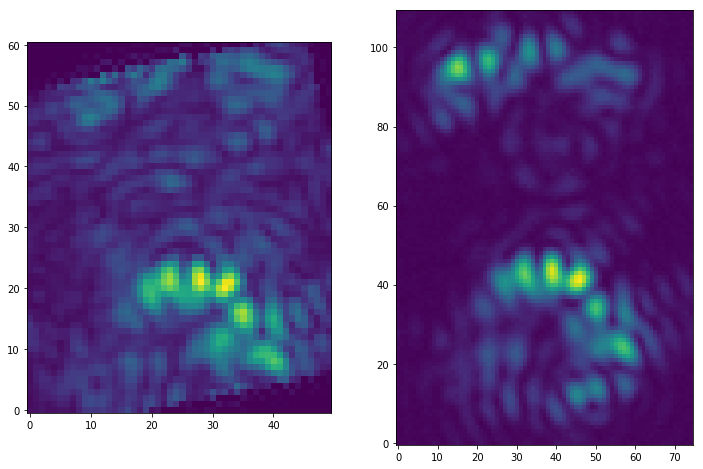

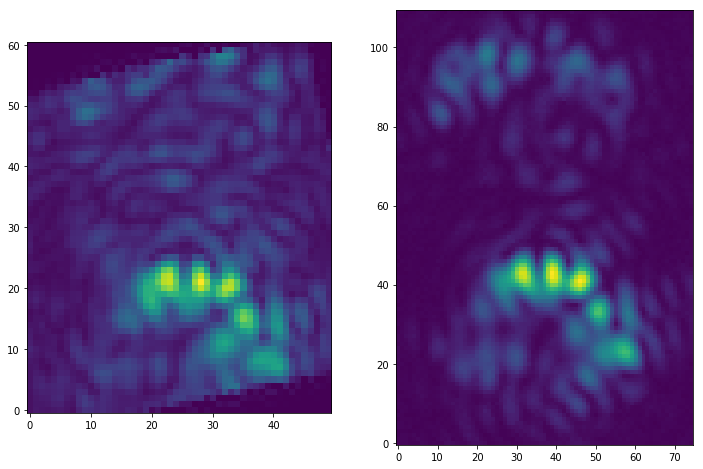

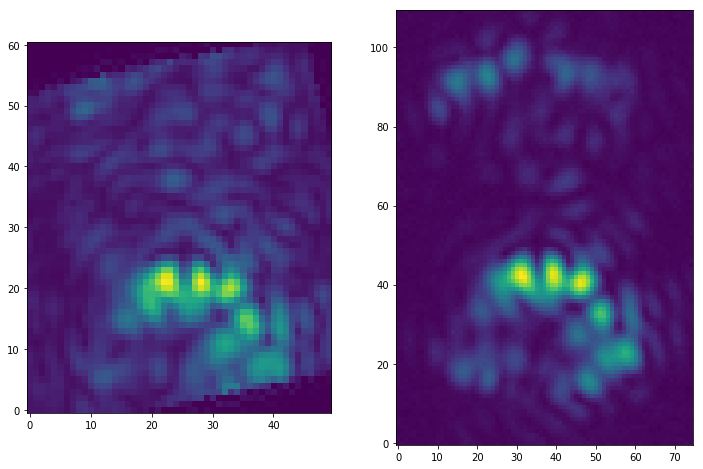

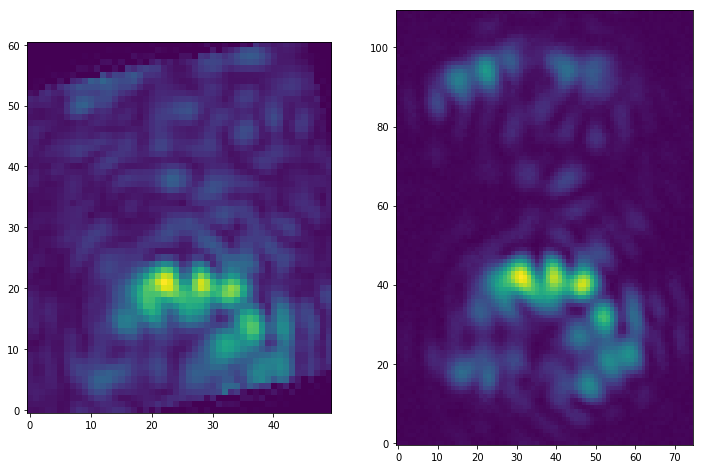

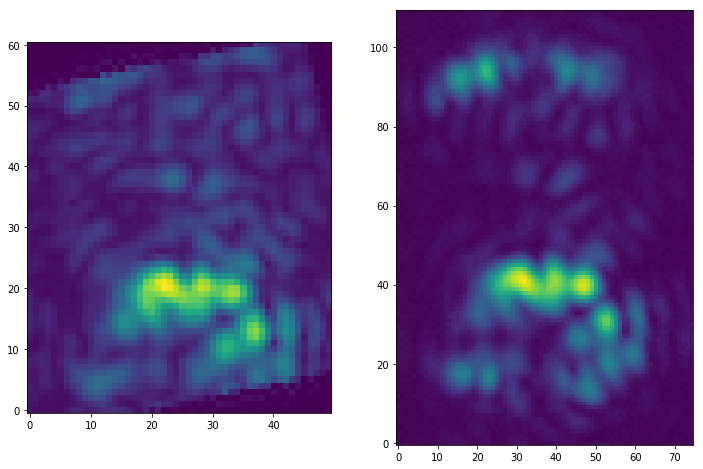

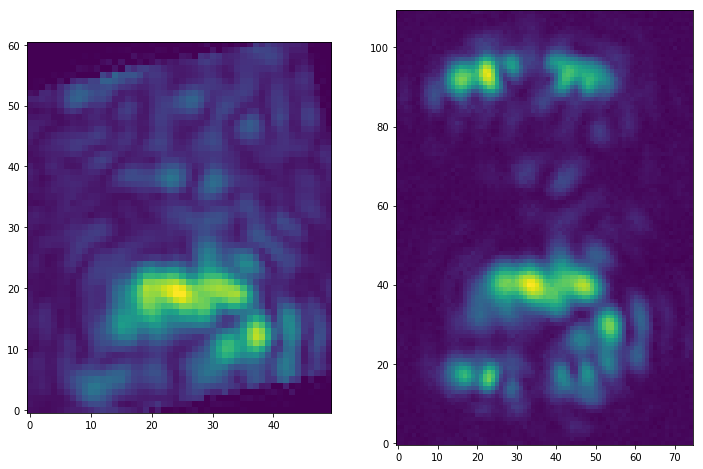

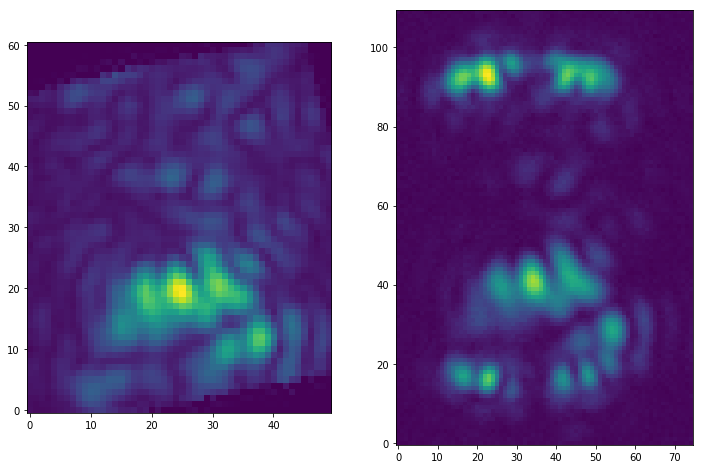

In [29]:
for i in range(len(SPCslicename)):
    plt.figure(figsize=(12,8))
    plt.subplot(121)
    plt.imshow(np.sqrt(IFSslices[i,70:131,75:125]))
    plt.subplot(122)
    plt.imshow(np.sqrt(SPCslices[i,255:365,215:290]))
